In [3]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline

# Monte-Carlo estimation and importance sampling

This notebook contains a python adaptation of the importance saimpling example in [1].
The objective is to estimate the following expectation:
$$
    E_{p(\mathcal X)}[f(\mathcal X)],
$$
where $p(\mathcal X)$ is the uniform distribution between 0 and 10 and $f$ is defined as follows:
$$
    f(x) = 10 * \exp(-2 | x - 5|).
$$
The true value of the expectation is around 10, but we will approximate it using Monte-Carlo estimation and importance sampling.

[1] https://dept.stat.lsa.umich.edu/~jasoneg/Stat406/lab7.pdf

In [8]:
# the target function
def f(x):
    return 10 * torch.exp(-2 * torch.abs(x - 5))

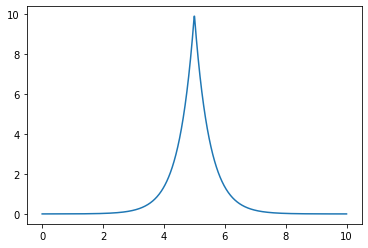

In [9]:
# plot the function between 0 and 10.
# observe that it is very peaked around x=5.
x = torch.linspace(0, 10, 1000).float()
y = f(x)
plt.plot(x, y)

## Monte-Carlo estimation

We first start with a simple Monte-Carlo estimationn.

In [18]:
# arguments:
# p: distribution of the expection
# f: function inside the expectation
# n_samples: number of samples to use in the MC estimation
#
# return:
# - the MC estimation
def monte_carlo(p, f, n_samples):
    samples = p.sample((n_samples,))
    values = f(samples)

    return torch.mean(values)

In [19]:
p = torch.distributions.uniform.Uniform(0, 10)

print("Examples of MC estimations with 10 samples:")
for _ in range(5):
    print(monte_carlo(p, f, 10))
print()
    
print("Examples of MC estimations with 100 samples:")
for _ in range(5):
    print(monte_carlo(p, f, 100))
print()
    
print("Examples of MC estimations with 1000 samples:")
for _ in range(5):
    print(monte_carlo(p, f, 1000))

Examples of MC estimations with 10 samples:
tensor(0.1217)
tensor(0.0738)
tensor(1.0896)
tensor(0.6689)
tensor(0.4570)

Examples of MC estimations with 100 samples:
tensor(1.0190)
tensor(0.8317)
tensor(1.1884)
tensor(0.9037)
tensor(1.2499)

Examples of MC estimations with 1000 samples:
tensor(0.9656)
tensor(0.9522)
tensor(0.9679)
tensor(1.0332)
tensor(1.0241)


## Importance sampling

We now estimate the expectation using importance sampling.

In [29]:
# arguments:
# p: distribution of the expection
# q: proposal distribution
# f: function inside the expectation
# n_samples: number of samples to use in the MC estimation
#
# return:
# - the MC estimation via importance sampling
def importance_sampling(p, q, f, n_samples):
    samples = q.sample((n_samples,))
    values = f(samples) * p.log_prob(samples).exp() / q.log_prob(samples).exp()

    return torch.mean(values)

In [30]:
p = torch.distributions.uniform.Uniform(0, 10)
q = torch.distributions.normal.Normal(5, 1)

p = torch.distributions.uniform.Uniform(0, 10)

print("Examples of MC+IS estimations with 10 samples:")
for _ in range(5):
    print(importance_sampling(p, q, f, 10))
print()
    
print("Examples of MC+IS estimations with 100 samples:")
for _ in range(5):
    print(importance_sampling(p, q, f, 100))
print()
    
print("Examples of MC+IS estimations with 1000 samples:")
for _ in range(5):
    print(importance_sampling(p, q, f, 1000))

Examples of MC+IS estimations with 10 samples:
tensor(1.0947)
tensor(0.8999)
tensor(0.8274)
tensor(0.8597)
tensor(0.8442)

Examples of MC+IS estimations with 100 samples:
tensor(0.9992)
tensor(0.9256)
tensor(1.0709)
tensor(0.9953)
tensor(0.9856)

Examples of MC+IS estimations with 1000 samples:
tensor(0.9722)
tensor(0.9881)
tensor(0.9997)
tensor(1.0162)
tensor(1.0050)


## Variance comparison

To compare the two estimation methods (with and without importance sampling), we can compare the mean and variance of these estimators.
In this setting, one "experiment" in a MC estimation with a fixed number of samples.
We run the experiment many times, and then compute the mean and variance of resulting estimations.

We can observe that the variance is lower with IS!

In [32]:
def variance_comparison(p, q, f, n_samples, n_experiments):
    results_mc = torch.empty(n_experiments)
    results_is = torch.empty(n_experiments)
    for i in range(n_experiments):
        results_mc[i] = monte_carlo(p, f, n_samples)
        results_is[i] = importance_sampling(p, q, f, n_samples)

    print(
        "Mean and variance over experiments for MC estimation with %i samples over %i experiments"
        % (n_samples, n_experiments)
    )
    print(results_mc.mean(), results_mc.var())
    print()

    print(
        "Mean and variance over experiments for MC+IS estimation with %i samples over %i experiments"
        % (n_samples, n_experiments)
    )
    print(results_is.mean(), results_is.var())

In [ ]:
p = torch.distributions.uniform.Uniform(0, 10)
q = torch.distributions.normal.Normal(5, 1)

In [38]:
variance_comparison(p, q, f, 1, 10000)

Mean and variance over experiments for MC estimation with 1 samples over 10000 experiments
tensor(1.0146) tensor(4.0534)

Mean and variance over experiments for MC+IS estimation with 1 samples over 10000 experiments
tensor(1.0114) tensor(0.3666)


In [39]:
variance_comparison(p, q, f, 5, 10000)

Mean and variance over experiments for MC estimation with 5 samples over 10000 experiments
tensor(1.0061) tensor(0.7989)

Mean and variance over experiments for MC+IS estimation with 5 samples over 10000 experiments
tensor(0.9975) tensor(0.0709)


In [34]:
variance_comparison(p, q, f, 10, 10000)

Mean and variance over experiments for MC estimation with 10 samples over 10000 experiments
tensor(0.9976) tensor(0.3946)

Mean and variance over experiments for MC+IS estimation with 10 samples over 10000 experiments
tensor(1.0006) tensor(0.0356)


In [35]:
variance_comparison(p, q, f, 100, 10000)

Mean and variance over experiments for MC estimation with 100 samples over 10000 experiments
tensor(0.9979) tensor(0.0400)

Mean and variance over experiments for MC+IS estimation with 100 samples over 10000 experiments
tensor(0.9997) tensor(0.0035)


In [36]:
variance_comparison(p, q, f, 1000, 10000)

Mean and variance over experiments for MC estimation with 1000 samples over 10000 experiments
tensor(0.9992) tensor(0.0040)

Mean and variance over experiments for MC+IS estimation with 1000 samples over 10000 experiments
tensor(1.0000) tensor(0.0004)


We can redo the experiment with a "bad" proposal distribution. In this case, the variance is worse for IS.

In [40]:
p = torch.distributions.uniform.Uniform(0, 10)
q_bad = torch.distributions.normal.Normal(9, 1)

In [41]:
variance_comparison(p, q_bad, f, 1, 10000)

Mean and variance over experiments for MC estimation with 1 samples over 10000 experiments
tensor(1.0154) tensor(4.0001)

Mean and variance over experiments for MC+IS estimation with 1 samples over 10000 experiments
tensor(1.2168) tensor(4652.5376)


In [42]:
variance_comparison(p, q_bad, f, 5, 10000)

Mean and variance over experiments for MC estimation with 5 samples over 10000 experiments
tensor(1.0089) tensor(0.8122)

Mean and variance over experiments for MC+IS estimation with 5 samples over 10000 experiments
tensor(0.4593) tensor(229.9347)


In [43]:
variance_comparison(p, q_bad, f, 10, 10000)

Mean and variance over experiments for MC estimation with 10 samples over 10000 experiments
tensor(0.9954) tensor(0.3953)

Mean and variance over experiments for MC+IS estimation with 10 samples over 10000 experiments
tensor(0.4321) tensor(108.3199)


In [44]:
variance_comparison(p, q_bad, f, 100, 10000)

Mean and variance over experiments for MC estimation with 100 samples over 10000 experiments
tensor(0.9994) tensor(0.0406)

Mean and variance over experiments for MC+IS estimation with 100 samples over 10000 experiments
tensor(1.0724) tensor(125.7641)


In [45]:
variance_comparison(p, q_bad, f, 1000, 10000)

Mean and variance over experiments for MC estimation with 1000 samples over 10000 experiments
tensor(1.0003) tensor(0.0041)

Mean and variance over experiments for MC+IS estimation with 1000 samples over 10000 experiments
tensor(0.9318) tensor(12.6607)
